Given a list of reviews, a list of keywords and an integer k. Find the most popular k keywords in order of most to least frequently mentioned.

The comparison of strings is case-insensitive. If keywords are mentioned an equal number of times in reviews, 

Example 1: Input:
k = 2
keywords = ["anacell", "cetracular", "betacellular"]
reviews = [
  "Anacell provides the best services in the city",
  "betacellular has awesome services",
  "Best services provided by anacell, everyone should use anacell",
]

Output:
["anacell", "betacellular"]

Explanation:
"anacell" is occuring in 2 different reviews and "betacellular" is only occuring in 1 review.

In [2]:
k = 2
keywords = ["anacell", "betacellular", "cetracular", "deltacellular", "eurocell"]
reviews = [
  "I love anacell Best services; Best services provided by anacell",
  "betacellular has great services",
  "deltacellular provides much better services than betacellular",
  "cetracular is worse than anacell",
  "Betacellular is better than deltacellular.",
]

import re
import heapq
from collections import Counter

class Element:
    def __init__(self, word, freq):
        self.word = word
        self.freq = freq
        
    def __lt__(self, other):
        if self.freq == other.freq:
            return self.word > other.word
        return self.freq < other.freq

def topKFrequent(k, keywords, reviews):
    '''
    k: int
    keywwords: list of string
    reviews: list of string
    '''
    word_list = []
    
    for review in reviews:
        word_list += set(review.lower().replace('[^a-z0-9]', '').split())
    
    count = Counter(word_list)
    
    heap = []
    
    for word, freq in count.items():
        if word in keywords:
            heapq.heappush(heap, Element(word, freq))
            if len(heap) > k:
                heapq.heappop(heap)
    
    return [heapq.heappop(heap).word for _ in range(k)][::-1]
    

print(topKFrequent(k, keywords, reviews))

['betacellular', 'anacell']


In [8]:
## Alternative solution

def freqWords(k, keywords, reviews):
    keyDict = {}
    for keyword in keywords:
        keyDict[keyword] = 0

    for review in reviews:
        for keyword in keywords:
            if keyword in review.lower():
                keyDict[keyword] += 1
            

            
    sortedKeyList = sorted(keyDict.items(), key = lambda x:(-x[1], x[0]))

    result = []
    for val in sortedKeyList:
        result.append(val[0])

    return result[:k]

freqWords(k, keywords, reviews)

['betacellular', 'anacell']

Given a 2D grid, each cell is either a zombie 1 or a human 0. Zombies can turn adjacent (up/down/left/right) human beings into zombies every hour. Find out how many hours does it take to infect all humans? [similar](https://leetcode.com/problems/rotting-oranges/)  

Example:    

Input:   
[[0, 1, 1, 0, 1],   
 [0, 1, 0, 1, 0],   
 [0, 0, 0, 0, 1],   
 [0, 1, 0, 0, 0]]

Output: 2   

Explanation:   
At the end of the 1st hour, the status of the grid:   
[[1, 1, 1, 1, 1],   
 [1, 1, 1, 1, 1],   
 [0, 1, 0, 1, 1],   
 [1, 1, 1, 0, 1]]   

At the end of the 2nd hour, the status of the grid:   
[[1, 1, 1, 1, 1],   
 [1, 1, 1, 1, 1],   
 [1, 1, 1, 1, 1],   
 [1, 1, 1, 1, 1]]   

### Polynomial Regression Office Prices   
we want to predict sale from history data as the following format.

Sample Input   
2 7   
0.18 0.89 109.85   
1.0 0.26  155.72   
0.92 0.11 137.66   
0.07 0.37  76.17   
0.85 0.16 139.75   
0.99 0.41 162.6   
0.87 0.47 151.77

4   
0.49 0.18    
0.57 0.83   
0.56 0.64   
0.76 0.18   

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# enter number of features and number of data for training
F, N = map(int, input().strip().split())

2 7


In [15]:
train_x, train_y, test_x = [] , [] ,[]
for i in range(N):
    tmp =[float(x) for x in map(float, input().strip().split())]
    train_x.append(tmp[0:-1])
    train_y.append(tmp[0-1])
    

0.18 0.89 109.85
1.0 0.26 155.72
0.92 0.11 137.66
0.07 0.37 76.17
0.85 0.16 139.75
0.99 0.41 162.6
0.87 0.47 151.77


In [17]:
# enter the number of testing
N= int(input().strip())
for i in range(N):
    tmp = [float(x) for x in map(float, input().strip().split())]
    test_x.append(tmp)
    

4
0.49 0.18
0.57 0.83
0.56 0.64
0.76 0.18


In [21]:
poly = PolynomialFeatures(degree=3)
processed_train_x = poly.fit_transform(train_x)
model = LinearRegression().fit(processed_train_x, train_y)
processed_test = poly.transform(test_x)
predict = model.predict(processed_test)
for each_prediction in predict:
    print(each_prediction)

115.22499916872385
118.01549081653562
117.35503688371753
135.8293100265431


**Time series**   


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


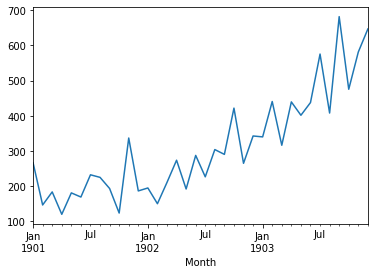

In [8]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('./Downloads/data/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
plt.show()

**Autoregression (AR)**   
The notation for the model involves specifying the order of the model p as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregression model

In [13]:
type(series)

pandas.core.series.Series

In [16]:
upsampled = series.resample('D')
print(upsampled)

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]


In [17]:
upsampled


In [19]:
upsampled

In [27]:
import datetime
import numpy as np


idx = pd.date_range('2018-01-01', periods=5, freq='H')

ts = pd.Series(range(len(idx)), index=idx)
ts

2018-01-01 00:00:00    0
2018-01-01 01:00:00    1
2018-01-01 02:00:00    2
2018-01-01 03:00:00    3
2018-01-01 04:00:00    4
Freq: H, dtype: int64

In [31]:
ts.resa

pandas.core.series.Series

In [32]:
type(series)

pandas.core.series.Series

### Create datetime list

In [70]:
pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y')

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

In [44]:
import pandas as pd
from datetime import datetime

df = pd.DataFrame({'year':[2019,2020,2019,2020,2020,2018,2020,2019,2019,2020,2020],
                  'month':[1,1,1,2,2,2,3,3,3,3,4], 'day':[2,4,3,6,24,21,6,10,9,11,15]}
                 )
df.head()

,year,month,day
0,2019,1,2
1,2020,1,4
2,2019,1,3
3,2020,2,6
4,2020,2,24


In [47]:
df['trans_date']= pd.to_datetime((df.year*10000+df.month*100+df.day).apply(str),format='%Y%m%d')
df.dtypes

year                   int64
month                  int64
day                    int64
trans_date    datetime64[ns]
dtype: object

In [48]:
df.head()

,year,month,day,trans_date
0,2019,1,2,2019-01-02
1,2020,1,4,2020-01-04
2,2019,1,3,2019-01-03
3,2020,2,6,2020-02-06
4,2020,2,24,2020-02-24


In [49]:
df = pd.DataFrame({'year':[2019,2020,2019,2020,2020,2018,2020,2019,2019,2020,2020],
                  'month':[1,1,1,2,2,2,3,3,3,3,4], 'day':[2,4,3,6,24,21,6,10,9,11,15],
                  'hour':[7,12,4,17,21,4,20,14,8,9,4], 'minute':[1,45,12,6,34,2,15,23,11,6,4],
                  'second':[0,0,2,1,4,2,6,1,0,0,4]}
                 )
df.head()

,year,month,day,hour,minute,second
0,2019,1,2,7,1,0
1,2020,1,4,12,45,0
2,2019,1,3,4,12,2
3,2020,2,6,17,6,1
4,2020,2,24,21,34,4


In [52]:
df['trans_date']= pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])
df.head()

,year,month,day,hour,minute,second,trans_date
0,2019,1,2,7,1,0,2019-01-02 07:01:00
1,2020,1,4,12,45,0,2020-01-04 12:45:00
2,2019,1,3,4,12,2,2019-01-03 04:12:00
3,2020,2,6,17,6,1,2020-02-06 17:06:00
4,2020,2,24,21,34,4,2020-02-24 21:34:00


In [53]:
df.dtypes

year                   int64
month                  int64
day                    int64
hour                   int64
minute                 int64
second                 int64
trans_date    datetime64[ns]
dtype: object

**Create series of datetime**

In [56]:
pd.date_range(start='1/1/2020', periods = 10, freq ='H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00'],
              dtype='datetime64[ns]', freq='H')

In [57]:
pd.date_range(start='1/1/2020', periods = 10, freq ='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [58]:
pd.date_range(start='1/1/2020', periods = 10, freq ='M')

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31'],
              dtype='datetime64[ns]', freq='M')

### Break datetime into multiple columns

In [82]:
df['Y'] = df.trans_date.dt.year
df['M'] =  df.trans_date.dt.month
df['D'] = df.trans_date.dt.day
df['H'] = df.trans_date.dt.hour
df['DoW'] = df.trans_date.dt.dayofweek  # Monday=0, Sunday=6.
df['day_name'] = df.trans_date.dt.day_name()
df.head()

,year,month,day,hour,minute,second,trans_date,Y,M,D,H,DoW,day_name
0,2019,1,2,7,1,0,2019-01-02 07:01:00,2019,1,2,7,2,Wednesday
1,2020,1,4,12,45,0,2020-01-04 12:45:00,2020,1,4,12,5,Saturday
2,2019,1,3,4,12,2,2019-01-03 04:12:00,2019,1,3,4,3,Thursday
3,2020,2,6,17,6,1,2020-02-06 17:06:00,2020,2,6,17,3,Thursday
4,2020,2,24,21,34,4,2020-02-24 21:34:00,2020,2,24,21,0,Monday


#### Sample datetime data [credit](https://www.w3resource.com/pandas/series/series-resample.php)

In [93]:
import random
index = pd.date_range('1/1/2019', periods=20, freq='T')
series = pd.Series(random.sample(range(10, 30), 20), index=index)
series

2019-01-01 00:00:00    13
2019-01-01 00:01:00    26
2019-01-01 00:02:00    16
2019-01-01 00:03:00    20
2019-01-01 00:04:00    19
2019-01-01 00:05:00    24
2019-01-01 00:06:00    21
2019-01-01 00:07:00    14
2019-01-01 00:08:00    29
2019-01-01 00:09:00    12
2019-01-01 00:10:00    27
2019-01-01 00:11:00    25
2019-01-01 00:12:00    11
2019-01-01 00:13:00    15
2019-01-01 00:14:00    17
2019-01-01 00:15:00    18
2019-01-01 00:16:00    28
2019-01-01 00:17:00    22
2019-01-01 00:18:00    10
2019-01-01 00:19:00    23
Freq: T, dtype: int64

In [95]:
### Downsample the series into 3 minute bins and sum the values of the timestamps falling into a bin.

In [94]:
series.resample('3T').sum()

2019-01-01 00:00:00    55
2019-01-01 00:03:00    63
2019-01-01 00:06:00    64
2019-01-01 00:09:00    64
2019-01-01 00:12:00    43
2019-01-01 00:15:00    68
2019-01-01 00:18:00    33
Freq: 3T, dtype: int64

Downsample the series into 3 minute bins as above, but label each bin using the right edge instead of the left.

In [96]:
series.resample('3T', label='right').sum()

2019-01-01 00:03:00    55
2019-01-01 00:06:00    63
2019-01-01 00:09:00    64
2019-01-01 00:12:00    64
2019-01-01 00:15:00    43
2019-01-01 00:18:00    68
2019-01-01 00:21:00    33
Freq: 3T, dtype: int64

Downsample the series into 3 minute bins as above, but close the right side of the bin interval.

In [97]:
series.resample('3T', label='right', closed='right').sum()

2019-01-01 00:00:00    13
2019-01-01 00:03:00    62
2019-01-01 00:06:00    64
2019-01-01 00:09:00    55
2019-01-01 00:12:00    63
2019-01-01 00:15:00    50
2019-01-01 00:18:00    60
2019-01-01 00:21:00    23
Freq: 3T, dtype: int64

**Upsample the series into 30 second bins**

In [98]:
series.resample('30S').asfreq()[0:5]   # Select first 5 rows

2019-01-01 00:00:00    13.0
2019-01-01 00:00:30     NaN
2019-01-01 00:01:00    26.0
2019-01-01 00:01:30     NaN
2019-01-01 00:02:00    16.0
Freq: 30S, dtype: float64

Upsample the series into 30 second bins and fill the NaN values using the pad method.

In [99]:
series.resample('30S').pad()[0:5]

2019-01-01 00:00:00    13
2019-01-01 00:00:30    13
2019-01-01 00:01:00    26
2019-01-01 00:01:30    26
2019-01-01 00:02:00    16
Freq: 30S, dtype: int64

Upsample the series into 30 second bins and fill the NaN values using the bfill method.

In [100]:
series.resample('30S').bfill()[0:5]

2019-01-01 00:00:00    13
2019-01-01 00:00:30    26
2019-01-01 00:01:00    26
2019-01-01 00:01:30    16
2019-01-01 00:02:00    16
Freq: 30S, dtype: int64

### For DataFrame objects, the keyword on can be used to specify the column instead,
of the index for resampling.

In [102]:
d = dict({'price': [8, 9, 7, 11, 12, 16, 15, 17],
          'volume': [40, 50, 30, 80, 40, 80, 30, 40]})
df = pd.DataFrame(d)
df['week_starting'] = pd.date_range('01/01/2019', periods=8, freq='W')
df

,price,volume,week_starting
0,8,40,2019-01-06
1,9,50,2019-01-13
2,7,30,2019-01-20
3,11,80,2019-01-27
4,12,40,2019-02-03
5,16,80,2019-02-10
6,15,30,2019-02-17
7,17,40,2019-02-24


In [103]:
df.resample('M', on='week_starting').mean()

,price,volume
week_starting,,
2019-01-31,8.75,50.0
2019-02-28,15.00,47.5


### For a DataFrame with MultiIndex, the keyword level can be used to specify on which level the resampling needs to take place.

In [105]:
days = pd.date_range('1/1/2019', periods=4, freq='D')
d2 = dict({'price': [8, 9, 7, 11, 12, 16, 15, 17],
           'volume': [40, 50, 30, 80, 40, 80, 30, 40]})

df2 = pd.DataFrame(d2,
                   index=pd.MultiIndex.from_product([days,
                                                    ['morning',
                                                     'afternoon']]
                                                    ))
df2

price  volume
2019-01-01 morning        8      40
           afternoon      9      50
2019-01-02 morning        7      30
           afternoon     11      80
2019-01-03 morning       12      40
           afternoon     16      80
2019-01-04 morning       15      30
           afternoon     17      40